In [3]:
from bs4 import BeautifulSoup
import re
import json
import csv
from io import StringIO
import requests


In [23]:
url_data = 'https://finance.yahoo.com/quote/CL%3DF/history?period1=1501977600&period2=1659744000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'


In [24]:
response = requests.get(url_data)

In [25]:
response.text

'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [2]:

# load the data and replace the '..' with nan
econ_df = pd.read_csv('SMData.csv')
econ_df = econ_df.replace('..','nan')



In [3]:
econ_df

,Date,SmartLink Price,CPI,CFPI,WPI,SM Volume
0,42021,85.000000,157.8,156.4,108.9,124331
1,52021,93.599998,160.4,159.4,109.8,973122
2,62021,113.099998,161.3,161.3,110.7,4901473
3,72021,123.599998,162.5,162.9,115.2,3873077
4,82021,103.250000,162.9,162.7,117.9,754324
5,92021,118.099998,163.2,162.7,119.0,2700710
6,102021,113.300003,165.5,166.9,126.0,1011516
7,112021,102.199997,166.7,169.1,136.0,393907
8,122021,230.750000,166.2,167.1,133.8,5250471
9,12022,167.100006,165.7,164.9,135.3,2587497


In [4]:
econ_df.set_index('Date')


,SmartLink Price,CPI,CFPI,WPI,SM Volume
Date,,,,,
42021,85.000000,157.8,156.4,108.9,124331
52021,93.599998,160.4,159.4,109.8,973122
62021,113.099998,161.3,161.3,110.7,4901473
72021,123.599998,162.5,162.9,115.2,3873077
82021,103.250000,162.9,162.7,117.9,754324
92021,118.099998,163.2,162.7,119.0,2700710
102021,113.300003,165.5,166.9,126.0,1011516
112021,102.199997,166.7,169.1,136.0,393907
122021,230.750000,166.2,167.1,133.8,5250471


In [5]:
econ_df = econ_df.astype(float)



In [6]:
econ_df = econ_df.iloc[0:15, :]
print(econ_df)

        Date  SmartLink Price    CPI   CFPI    WPI  SM Volume
0    42021.0        85.000000  157.8  156.4  108.9   124331.0
1    52021.0        93.599998  160.4  159.4  109.8   973122.0
2    62021.0       113.099998  161.3  161.3  110.7  4901473.0
3    72021.0       123.599998  162.5  162.9  115.2  3873077.0
4    82021.0       103.250000  162.9  162.7  117.9   754324.0
5    92021.0       118.099998  163.2  162.7  119.0  2700710.0
6   102021.0       113.300003  165.5  166.9  126.0  1011516.0
7   112021.0       102.199997  166.7  169.1  136.0   393907.0
8   122021.0       230.750000  166.2  167.1  133.8  5250471.0
9    12022.0       167.100006  165.7  164.9  135.3  2587497.0
10   22022.0       126.500000  166.1  164.6  138.3   365331.0
11   32022.0       113.750000  167.7  166.9  143.9   394661.0
12   42022.0       124.000000  170.1  169.4  151.2   555749.0
13   52022.0       113.550003  171.7  172.1  154.4   290452.0
14   62022.0       111.750000  172.6  173.8  155.4   199387.0


In [7]:
display('-'*100)
display(econ_df.isnull().any())

'----------------------------------------------------------------------------------------------------'

Date               False
SmartLink Price    False
CPI                False
CFPI               False
WPI                False
SM Volume          False
dtype: bool

In [11]:
display(econ_df.head())

,Date,SmartLink Price,CPI,CFPI,WPI,SM Volume
0,42021.0,85.000000,157.8,156.4,108.9,124331.0
1,52021.0,93.599998,160.4,159.4,109.8,973122.0
2,62021.0,113.099998,161.3,161.3,110.7,4901473.0
3,72021.0,123.599998,162.5,162.9,115.2,3873077.0
4,82021.0,103.250000,162.9,162.7,117.9,754324.0


In [9]:
econ_df = econ_df.drop(['Adj Close','Open', 'High', 'Low'], axis = 1)



KeyError: "['Adj Close', 'Open', 'High', 'Low'] not found in axis"

In [12]:

# calculate the correlation matrix
corr = econ_df.corr()


<AxesSubplot:>

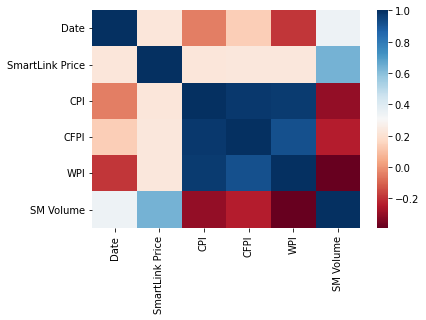

In [13]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

In [17]:
econ_df_before = econ_df

x1 = sm.tools.add_constant(econ_df_before)


series_before = pd.Series([variance_inflation_factor(x1.values, i) for  i in range(x1.shape[1])], index = x1.columns)

print ("Data Before")
print('-'*100)
display(series_before)


Data Before


const              48390.874361
Date                   4.821274
SmartLink Price        5.366098
CPI                  122.571030
CFPI                  79.989024
WPI                   59.098676
SM Volume              5.775378
dtype: float64

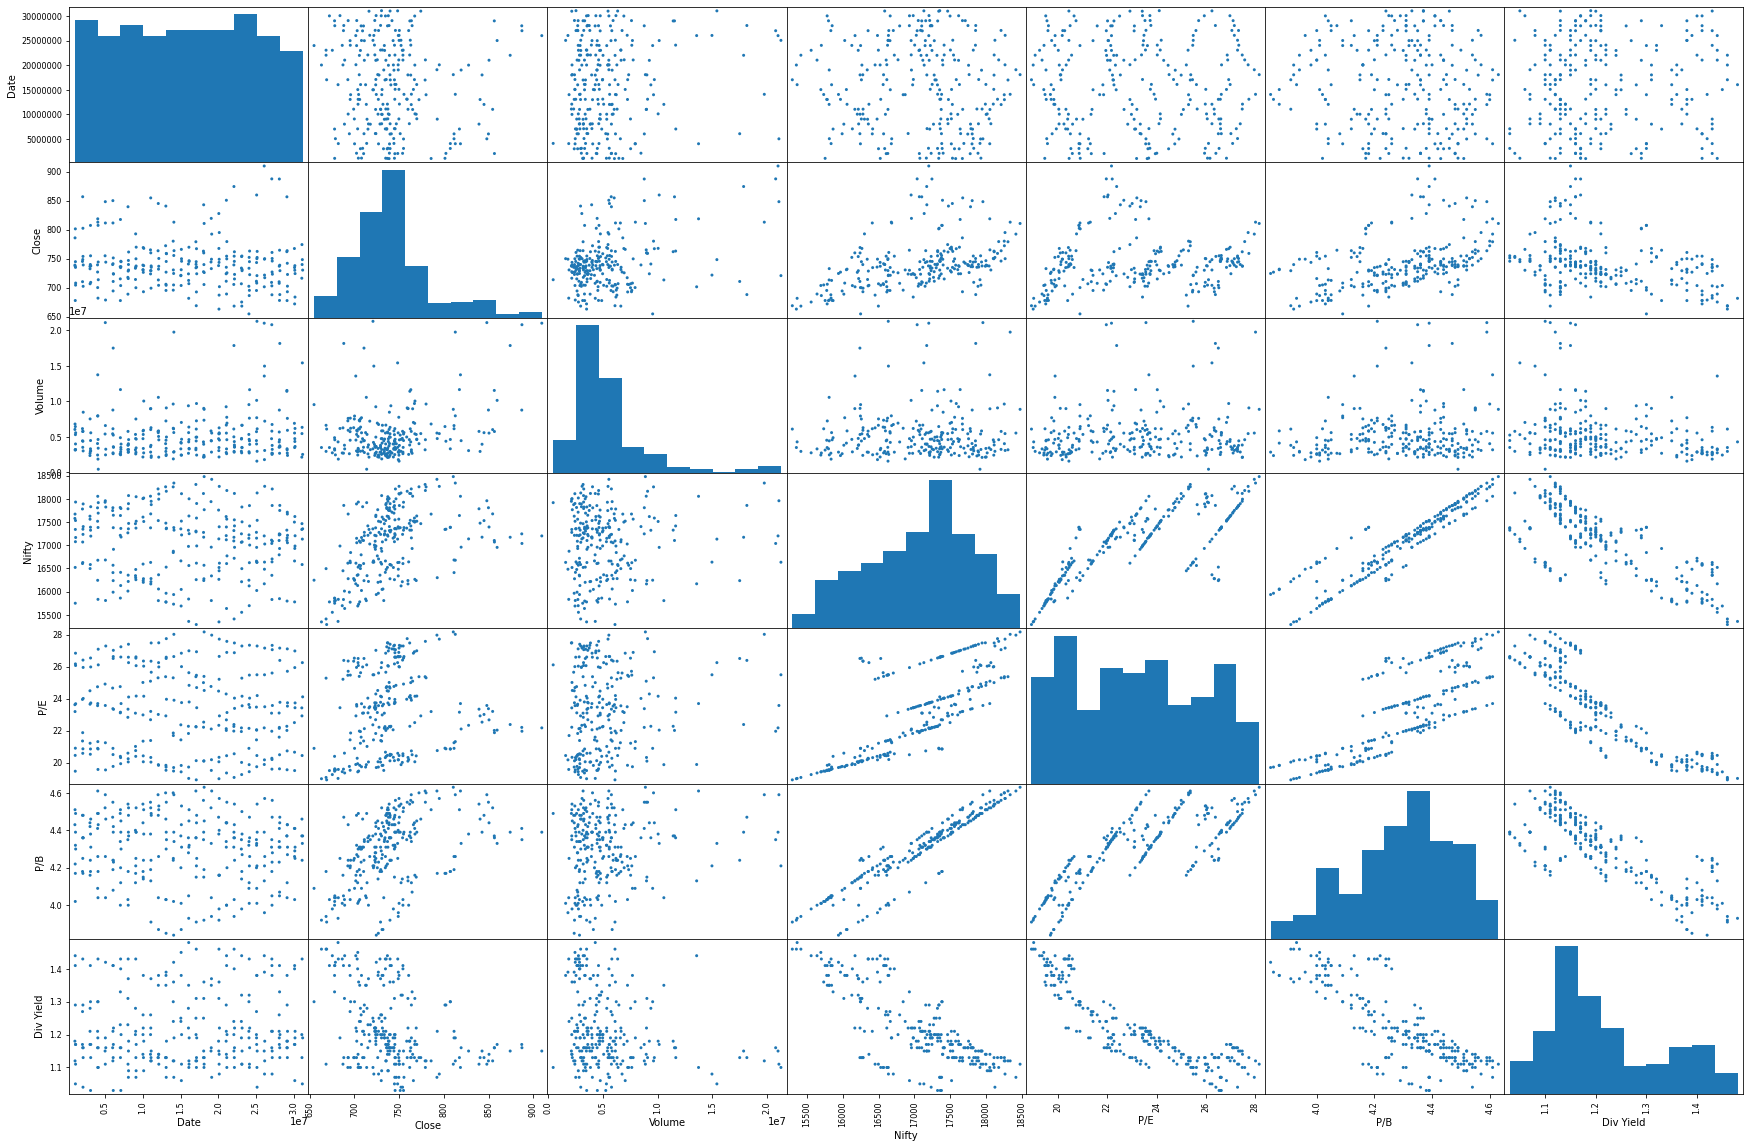

In [159]:
pd.plotting.scatter_matrix(econ_df_before, alpha = 1, figsize = (30, 20))

plt.show()